# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import glob
import string

# There were a few deprecation warnings
import warnings
warnings.filterwarnings('ignore')




from collections import Counter
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

In [2]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/HunterBlum/OneDrive/School/SanDiego/Courses/Text/TextMining_HBlum/data/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [3]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = sum(len(i) for i in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        c = Counter(tokens)
        top_five = c.most_common(5)
        top_five_df = pd.DataFrame(top_five, columns= ['Token', 'Count'])
        print("\nFive Most Common Tokens: \n\n", top_five_df)

    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [4]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.

Five Most Common Tokens: 

      Token  Count
0     text      3
1     here      2
2  example      2
3       is      1
4     some      1


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are good because they allow us to check our code within the function to make sure it is doing everything correctly. In our case, we used a simple list to ensure that our four metrics were calculating correctly. Since, it is fairly easy to calculate the metrics on the list, we can simply set the assertions to be equal to our hand-calculated metric. Then if everything runs without error, we know that we created our function and calculations correctly. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [5]:
# Read in the lyrics data
# Get the filepaths for our artists
artists = ["beatles", "ledzeppelin"]
lyrics_filepaths = []
artist_list = []

for i in artists:

    # Create the file path for each artist
    path = data_location + lyrics_folder + i

    # Get the files
    txt_files = glob.glob(os.path.normpath(os.path.join(path, "*.txt")))

    # Create artist list we'll need for df
    temp_list = [i] * len(txt_files)
    artist_list = artist_list + temp_list

    # Join the filepaths from different artists
    lyrics_filepaths = lyrics_filepaths + txt_files

    


lyrics_list = []
song_list = []


for file in lyrics_filepaths:

    # Get the song title
    file_temp = open(file, "r")
    title = file_temp.readline().rstrip()
    song_list.append(title)

    # Get the lyrics
    list = file_temp.readlines()[1:]
    lyrics = "".join(list)
    lyrics = lyrics.replace('\n', " ")
    lyrics_list.append(lyrics)
    file_temp.close()

# Convert to df
dict = {'Artist': artist_list, 'Song': song_list, 'Lyrics': lyrics_list}
lyrics_df = pd.DataFrame(dict)

lyrics_df.head()

,Artist,Song,Lyrics
0,beatles,"""All I've Got To Do""","Whenever I want you around, yeah All I gott..."
1,beatles,"""All My Loving""",Close your eyes and I'll kiss you Tomorrow ...
2,beatles,"""Anna (Go To Him)""","Anna You come and ask me, girl To set you f..."
3,beatles,"""Ask Me Why""","I love you, 'cause you tell me things I wan..."
4,beatles,"""A Taste Of Honey""",A taste of honey Tasting much sweeter than ...


In [6]:
# Read in the twitter data - grab the filepaths
twitter_location = data_location + twitter_folder
twitter_filepaths = glob.glob(os.path.normpath(os.path.join(twitter_location, "*followers_data.txt")))

# Loop to read all files from our paths
res = []
artist_list = []

for file in twitter_filepaths:

    # Read in data and colnames
    file_temp = open(file, "r")
    colnames = file_temp.readline().rstrip().split('\t')
    lines = file_temp.readlines()
    
    # Read split out columns in data
    for x in lines:
        text_temp = x.rstrip().split('\t')
        res.append(text_temp)

        # Get the artist for df
        art_temp = file[file.rindex('\\')+1:]
        artist = art_temp.split('_followers')[0]
        artist_list.append(artist)

    
    file_temp.close

# Make df from results
twitter_df = pd.DataFrame(res, columns=colnames)
twitter_df['artist'] = artist_list
twitter_df.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,,1302,1014,None,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [7]:
# Create clean twitter data
twitter_clean = twitter_df.copy()

# Drop NAs - Not a description won't help us analyze a description
twitter_clean = twitter_clean.dropna()

# Remove puncuation
twitter_clean['description'] = twitter_clean['description'].str.replace('[{}]'.format(string.punctuation), '')

# Fold to lowercase
twitter_clean['description'] = twitter_clean['description'].str.lower()

# Tokenize by removing whitespace
twitter_clean['description'] = twitter_clean['description'].str.split()

# Remove stopwords
stop_words = stopwords.words('english')
desc_nostop = twitter_clean['description'].apply(lambda x: [item for item in x if item not in stop_words])
twitter_clean['description'] = desc_nostop


In [8]:
# Clean the lyrics data
lyrics_clean = lyrics_df.copy()

# Drop NAs - Shouldn't be a problem but, we'll keep it in to be safe
lyrics_clean = lyrics_clean.dropna()

# Remove puncation
lyrics_clean['Lyrics'] = lyrics_clean['Lyrics'].str.replace('[{}]'.format(string.punctuation), '')

# Fold to lower
lyrics_clean['Lyrics'] = lyrics_clean['Lyrics'].str.lower()

# Tokenize by removing whitespace
lyrics_clean['Lyrics'] = lyrics_clean['Lyrics'].str.split()

# Remove stopwords
stop_words = stopwords.words('english')
lyrics_nostop = lyrics_clean['Lyrics'].apply(lambda x: [item for item in x if item not in stop_words])
lyrics_clean['Lyrics'] = lyrics_nostop

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls).

I think this meant lyrics and twitter data for both artists, which would make sense for four calls.

In [9]:
# lyrics - Beatles
beatles = lyrics_clean[lyrics_clean['Artist'] == 'beatles']
beatles_corpus = [element for list_ in beatles['Lyrics'].values for element in list_]
print("The Beatles Lyrics Results:\n")
print(descriptive_stats(beatles_corpus))

# lyrics - Led Zeppelin
ledzep = lyrics_clean[lyrics_clean['Artist'] == 'ledzeppelin']
ledzep_corpus = [element for list_ in ledzep['Lyrics'].values for element in list_]
print("\nLed Zeppelin Lyrics Results:\n")
print(descriptive_stats(ledzep_corpus))

# twitter - cher
cher = twitter_clean[twitter_clean['artist'] == 'cher']
cher_corpus = [element for list_ in cher['description'].values for element in list_]
print("\nCher Twitter Results:\n")
print(descriptive_stats(cher_corpus))

# twitter - robynkonichiwa
rob = twitter_clean[twitter_clean['artist'] == 'robynkonichiwa']
rob_corpus = [element for list_ in rob['description'].values for element in list_]
print("\nrobynkonichiwa Twitter Results:\n")
print(descriptive_stats(rob_corpus))

The Beatles Lyrics Results:

There are 1757 tokens in the data.
There are 304 unique tokens in the data.
There are 7561 characters in the data.
The lexical diversity is 0.173 in the data.

Five Most Common Tokens: 

   Token  Count
0  love     72
1    la     59
2  know     44
3   ill     42
4  cmon     36
[1757, 304, 0.17302219692657939, 7561]

Led Zeppelin Lyrics Results:

There are 2370 tokens in the data.
There are 641 unique tokens in the data.
There are 10973 characters in the data.
The lexical diversity is 0.270 in the data.

Five Most Common Tokens: 

    Token  Count
0   baby    111
1   love     50
2  gonna     48
3     im     47
4   know     41
[2370, 641, 0.27046413502109706, 10973]

Cher Twitter Results:

There are 15671547 tokens in the data.
There are 1518213 unique tokens in the data.
There are 92955687 characters in the data.
The lexical diversity is 0.097 in the data.

Five Most Common Tokens: 

    Token   Count
0   love  214574
1     im  139096
2   life  122980
3  mus

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: 

Since stop words are some of the common words, I'd expect our top five words to be mostly stopwords if we didn't remove them. So we'd get words like "the" and "of", since they are so necessary in the English language. This wouldn't be very helpful for an analysis however, since each of the corpora that we would evaluate would return same stopwords. 

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: 

My prior belief was that Led Zeppelin would be higher. The Beatles have more pop-influences which consist of shorter songs with a lot of choruses. Many Led Zeppelin songs don't repeat choruses, so I figured this could lead to a higher lexical diversity. However, I did think that Led Zeppelin may be disadvantaged for having longer songs, as I know they have some fairly long ones. Having a longer document can artifically lower lexical diversity calculated by Type-Token Ratio, since the author may have to repeat several function words. Although we did remove stopwords, there may be other tokens we could consider stopwords that weren't removed. 


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [10]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [11]:
# cher
emoji_list = emoji.emoji_list(cher_corpus)

emoji_df = pd.DataFrame(emoji_list)
emoji_df['emoji'] = emoji_df['emoji'].astype(str)
cher_res = emoji_df.groupby('emoji')['emoji'].count().sort_values(ascending=False).head(10)
print('cher Emoji Results:\n', cher_res)

# robynkonichiwa
emoji_list = emoji.emoji_list(rob_corpus)

emoji_df = pd.DataFrame(emoji_list)
emoji_df['emoji'] = emoji_df['emoji'].astype(str)
rob_res = emoji_df.groupby('emoji')['emoji'].count().sort_values(ascending=False).head(10)
print('\nrobynkonichiwa Emoji Results:\n', rob_res)

cher Emoji Results:
 emoji
['♥']    10152
['❤']     9653
['✨']     8343
['🌈']     5482
['💙']     3685
['💜']     3499
['🌊']     3291
['💕']     3259
['🖤']     2937
['🎶']     2384
Name: emoji, dtype: int64

robynkonichiwa Emoji Results:
 emoji
['♥']    1166
['✨']     751
['❤']     652
['🌈']     570
['🎶']     272
['🎧']     213
['🖤']     212
['💜']     205
['💙']     181
['🐶']     166
Name: emoji, dtype: int64


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [18]:
# We'll need to use the raw data again since we deleted hashtags with the puncation :(
# We'll also leave in stopwords since they could be relevant to hashtags
twitter_ht = twitter_df.copy()

twitter_ht = twitter_ht.dropna()

# Fold to lower
twitter_ht['description'] = twitter_ht['description'].str.lower()

# Tokenize by removing whitespace
twitter_ht['description'] = twitter_ht['description'].str.split()

# Recreate the corpus for each artist
cher_ht = twitter_ht[twitter_ht['artist'] == 'cher']
cher_corpus_ht = [element for list_ in cher_ht['description'].values for element in list_]

rob_ht = twitter_ht[twitter_ht['artist'] == 'robynkonichiwa']
rob_corpus_ht = [element for list_ in rob_ht['description'].values for element in list_]

# Cher
cher_ht_list = [i for i in cher_corpus_ht if i.startswith("#")]
cher_count = Counter(cher_ht_list)
df = pd.DataFrame.from_dict(cher_count, orient='index').reset_index()
df = df.rename(columns={'index' : 'hashtags', 0:'count'})
cher_res = df.sort_values(by='count', ascending=False).head(10)
print("Cher Hashtag Results:\n")
print(cher_res)

# robynkonichiwa
rob_ht_list = [i for i in rob_corpus_ht if i.startswith("#")]
rob_count = Counter(rob_ht_list)
df = pd.DataFrame.from_dict(rob_count, orient='index').reset_index()
df = df.rename(columns={'index' : 'hashtags', 0:'count'})
rob_res = df.sort_values(by='count', ascending=False).head(10)
print("\nrobynknoichiwa Hashtag Results:\n")
print(rob_res)

Cher Hashtag Results:

              hashtags  count
29             #resist   9558
14                #blm   8753
3    #blacklivesmatter   7432
45                #fbr   2922
1       #theresistance   2883
85         #resistance   2405
105                 #1   2226
86                   #   1965
249          #voteblue   1897
528             #lgbtq   1457

robynknoichiwa Hashtag Results:

              hashtags  count
71   #blacklivesmatter    563
29                #blm    324
105             #music    260
39                  #1    187
871                  #    150
573    #teamfollowback    117
767               #edm    104
240            #resist     76
540       #freebritney     63
392             #lgbtq     58


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [13]:
# We'll need to apply our cleaning to the title column of our lyrics df

title_clean = lyrics_df.copy()

# Drop NAs - Shouldn't be a problem but, we'll keep it in to be safe
title_clean = title_clean.dropna()

# Remove puncation
title_clean['Song'] = title_clean['Song'].str.replace('[{}]'.format(string.punctuation), '')

# Fold to lower
title_clean['Song'] = title_clean['Song'].str.lower()

# Tokenize by removing whitespace
title_clean['Song'] = title_clean['Song'].str.split()

# Remove stopwords
stop_words = stopwords.words('english')
title_nostop = title_clean['Song'].apply(lambda x: [item for item in x if item not in stop_words])
title_clean['Song'] = title_nostop

# Split by artist again
beatles = title_clean[title_clean['Artist'] == 'beatles']
beatles_corpus = [element for list_ in beatles['Song'].values for element in list_]

ledzep = title_clean[title_clean['Artist'] == 'ledzeppelin']
ledzep_corpus = [element for list_ in ledzep['Song'].values for element in list_]

Count the title corpora

In [14]:
# beatles
beatles_count = Counter(beatles_corpus)
df = pd.DataFrame.from_dict(beatles_count, orient='index').reset_index()
df = df.rename(columns={'index' : 'word', 0:'count'})
beatles_res = df.sort_values(by='count', ascending=False).head(5)
print("The Beatles Song Title Results:\n")
print(beatles_res)

# ledzep
ledzep_count = Counter(ledzep_corpus)
df = pd.DataFrame.from_dict(ledzep_count, orient='index').reset_index()
df = df.rename(columns={'index' : 'word', 0:'count'})
ledzep_res = df.sort_values(by='count', ascending=False).head(5)
print("\nLed Zeppelin Song Title Results:\n")
print(ledzep_res)

The Beatles Song Title Results:

      word  count
24  please      2
22    love      2
0      ive      1
16     saw      1
29   twist      1

Led Zeppelin Song Title Results:

      word  count
14   times      3
22    song      2
2    gonna      2
24  loving      2
30     ive      1


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.11;0.775x0.77)
Artist 2    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

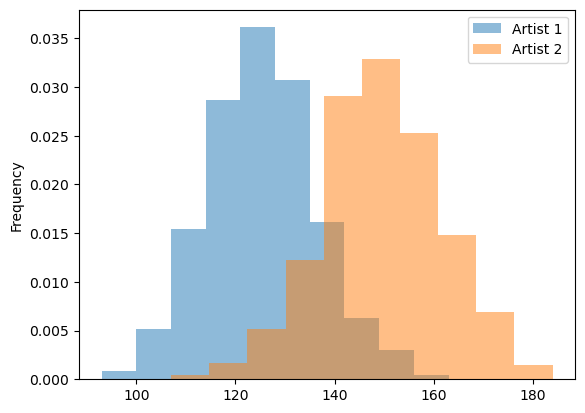

In [15]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: \s matches to any whitespace character and + means that it will search for all of the whitespace characters in the string.


In [16]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])


I think it is best to go back to the raw data. Stopwords do matter for the length of a song, since the singer doesn't just skip over them.

Artist
beatles        AxesSubplot(0.125,0.11;0.775x0.77)
ledzeppelin    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

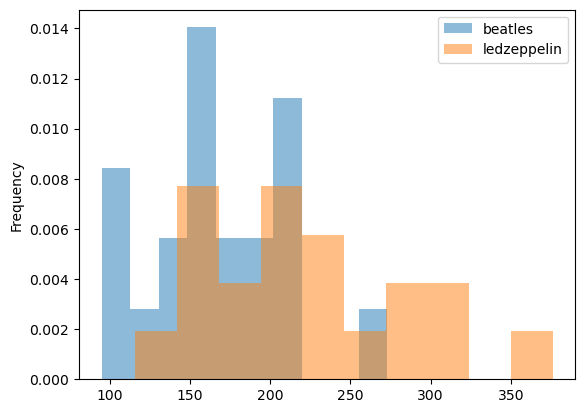

In [17]:
hist_df = lyrics_df.copy()

# Tokenize and get length
hist_df['Lyrics'] = hist_df['Lyrics'].apply(tokenize_lyrics)
hist_df['length'] = hist_df['Lyrics'].apply(len)

# Plot
hist_df.groupby('Artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)